In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None

In [3]:
custom_na_values = ["Sin información", "Sin informacion", 'Na', "Nd", 'No aplica']

### Leer datos

In [4]:
df_acciones = pd.read_csv('../../data/memoria_historica/casos_acciones_belicas.csv', na_values=custom_na_values)

### Limpieza

In [5]:
df_acciones = df_acciones.rename(
    {"ANNOH": "AÑO", "MUNINICIO_CASO": "MUNICIPIO", "DEPTO_CASO": "DEPARTAMENTO"}, 
    axis="columns")
df_acciones["AÑO"] = df_acciones["AÑO"].replace(0, np.nan)
df_acciones["DEPARTAMENTO"] = df_acciones["DEPARTAMENTO"].replace(
    {"Archipiélago de san andrés, providencia y santa catalina": "San Andrés", "La Guajira": "Guajira"}
).str.title().str.strip()
df_acciones["MUNICIPIO"] = df_acciones["MUNICIPIO"].str.title().str.strip()
df_acciones["MUNICIPIO_DEPARTAMENTO"] = df_acciones["MUNICIPIO"] + " (" + df_acciones["DEPARTAMENTO"] + ")"

In [6]:
df_acciones

,IdCaso,IdCasoRelacionado,DIAH,MESH,AÑO,REGION,DEPARTAMENTO,MUNICIPIO,Modalidad,Iniciativa,TipoUnidadAtacada,PRESUNTO_REPONSABLE,DESCRIPCION_PRESUNTO_RESPONSABLE,PRESUNTO_REPONSABLE2,DESCRIPCION_PRESUNTO_RESPONSABLE2,PRESUNTO_REPONSABLE3,DESCRIPCION_PRESUNTO_RESPONSABLE3,Capturas,GrupoPertenecenLosCapturados,LesionadosCiviles,LesionadosCombatientes,TotalMilitares,TotalPolicias,TotalOtrasFuerzasArmadasEstatales,TotalAgentesEstadoSinInformacion,TotalCombatientesFuerzasArmadasDelEstado,TotalCombatientesDeLasGuerrillas,TotalCombatientesDeLosParamilitares,TotalMuertosGrupoPosdesmovilizacion,TotalCombatientesSinInformacion,TotalCombatientesOtrosGruposArmadosOrganizados,TotalCombatientesGruposArmadosOrganizados,TotalCombatientesMuertos,TotalPersonasSinInformacion,TotalCivilesMuertos,TotalCivilesCombatientesMuertos,NumeroVictimasCaso,VentajaMilitar,Estado,MUNICIPIO_DEPARTAMENTO
0,1,Cr000497,12,3,2006.0,Atrato,Chocó,Bagadó,Combate y/o contacto armado,Grupos armados organizados,NaN,Agente del estado,Ejército nacional,Guerrilla,Farc,NaN,NaN,0.0,NaN,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,Grupos armados organizados,Publicado,Bagadó (Chocó)
1,2,NaN,0,0,NaN,Alto sinu y san jorge,Córdoba,Buenavista,Emboscada,Grupos armados organizados,Unidad en movimiento,Agente del estado,Das,Desconocido,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5,Grupos armados organizados,Publicado,Buenavista (Córdoba)
2,4,NaN,0,0,NaN,NaN,NaN,NaN,Emboscada,Grupos armados organizados,Unidad en movimiento,Agente del estado,No identificado,Guerrilla,Farc,NaN,NaN,0.0,NaN,0.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,Grupos armados organizados,Publicado,NaN
3,6,NaN,0,0,NaN,NaN,NaN,NaN,Ataque a instalación de las fuerzas armadas es...,Grupos armados organizados,Unidad fija,Agente del estado,Das,Guerrilla,Eln,NaN,NaN,0.0,NaN,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Grupos armados organizados,Publicado,NaN
4,7,NaN,0,0,NaN,NaN,NaN,NaN,Hostigamiento,Grupos armados organizados,Unidad en movimiento,Agente del estado,Fiscalía general de la nación,Guerrilla,Eln,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,3,Grupos armados organizados,Publicado,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34892,532455,NaN,30,9,1973.0,Nordeste antioqueño,Antioquia,Anorí,Combate y/o contacto armado,NaN,NaN,Agente del estado,Ejército nacional,Guerrilla,Eln,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1,NaN,Publicado,Anorí (Antioquia)
34893,532462,NaN,8,12,1973.0,Norte del tolima,Tolima,Ibagué,Hostigamiento,Grupos armados organizados,Unidad en movimiento,Agente del estado,Ejército nacional,Guerrilla,Farc,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,Grupos armados organizados,Publicado,Ibagué (Tolima)
34894,532465,NaN,8,7,1976.0,Sierra nevada de santa marta,La Guajira,Riohacha,Otro,Fuerzas armadas estatales,NaN,Agente del estado,Policía nacional,Agente del estado,Policía nacional,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0,1,Fuerzas armadas estatales,Publicado,Riohacha (La Guajira)
34895,532476,NaN,0,4,1975.0,NaN,Santander,NaN,Combate y/o contacto armado,Fuerzas armadas estatales,NaN,Agente del estado,Ejército nacional,Guerrilla,Eln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,2,Fuerzas armadas estatales,Publicado,NaN


## Tiempo y Lugar

<AxesSubplot:xlabel='AÑO', ylabel='events'>

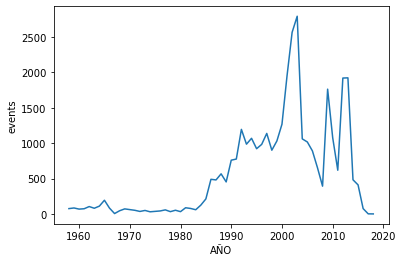

In [7]:
sns.lineplot(data=df_acciones.groupby("AÑO").size().reset_index().rename({0: "events"}, axis="columns"), x="AÑO", y="events")

<AxesSubplot:xlabel='events', ylabel='DEPARTAMENTO'>

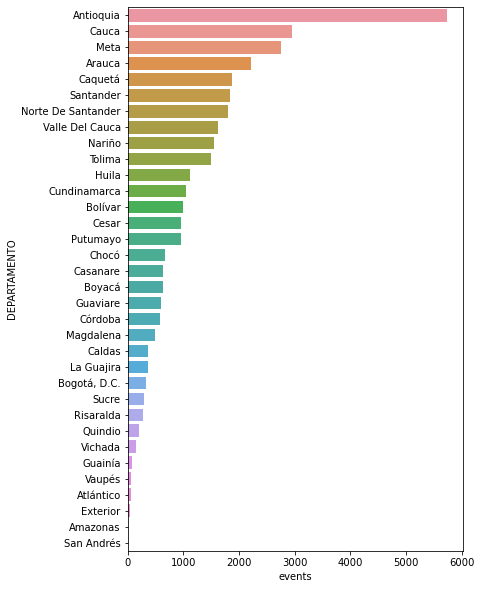

In [8]:
plt.figure(figsize=(6, 10))
sns.barplot(data=df_acciones.groupby("DEPARTAMENTO").size().sort_values(ascending=False) \
            .reset_index().rename({0: "events"}, axis="columns"), 
            y="DEPARTAMENTO", x="events")

In [9]:
df_acciones["MUNICIPIO_DEPARTAMENTO"].nunique()

998

In [10]:
df_acciones.groupby(["MUNICIPIO", "MUNICIPIO_DEPARTAMENTO"]).size().groupby("MUNICIPIO").count().nlargest(10)

MUNICIPIO
La Unión       4
Albania        3
Argelia        3
Bolívar        3
Buenavista     3
Córdoba        3
Granada        3
Guadalupe      3
Nariño         3
Sabanalarga    3
dtype: int64

<AxesSubplot:xlabel='events', ylabel='MUNICIPIO_DEPARTAMENTO'>

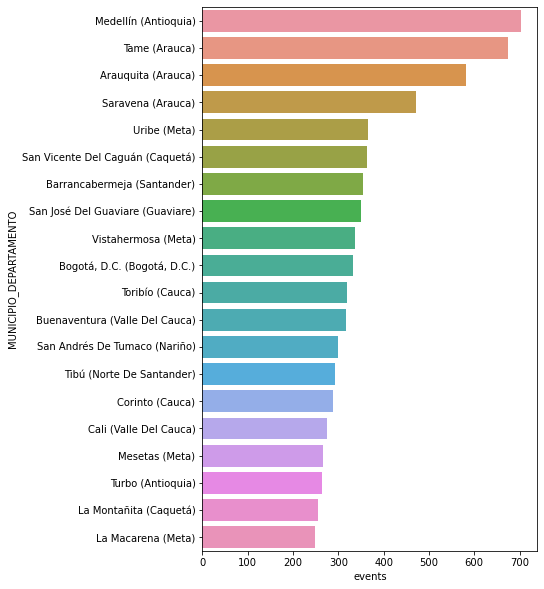

In [11]:
plt.figure(figsize=(6, 10))
sns.barplot(data=df_acciones.groupby("MUNICIPIO_DEPARTAMENTO").size().nlargest(20) \
            .reset_index().rename({0: "events"}, axis="columns"), 
            y="MUNICIPIO_DEPARTAMENTO", x="events")

<AxesSubplot:xlabel='events', ylabel='Modalidad'>

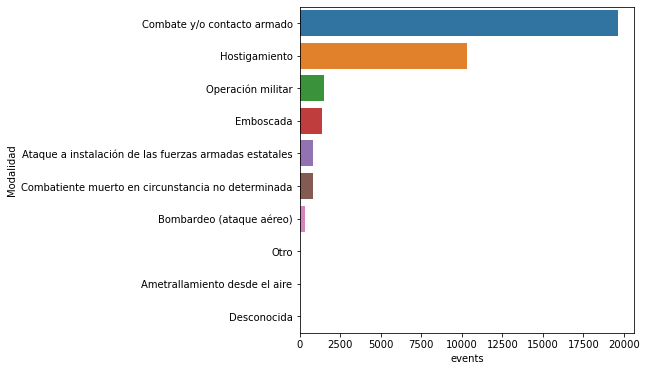

In [12]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df_acciones.groupby("Modalidad").size().nlargest(20) \
            .reset_index().rename({0: "events"}, axis="columns"), 
            y="Modalidad", x="events")

## Grupos Involucrados

<AxesSubplot:xlabel='events', ylabel='Iniciativa'>

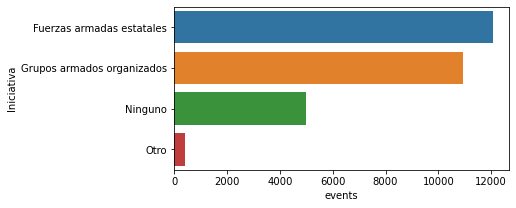

In [13]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df_acciones.groupby("Iniciativa").size().nlargest(20) \
            .reset_index().rename({0: "events"}, axis="columns"), 
            y="Iniciativa", x="events")

In [14]:
df_acciones.groupby(["Iniciativa", "Modalidad"]).size().reset_index().pivot("Modalidad", "Iniciativa", 0)

Iniciativa,Fuerzas armadas estatales,Grupos armados organizados,Ninguno,Otro
Modalidad,,,,
Ametrallamiento desde el aire,10.0,2.0,3.0,NaN
Ataque a instalación de las fuerzas armadas estatales,44.0,590.0,49.0,32.0
Bombardeo (ataque aéreo),180.0,19.0,24.0,NaN
Combate y/o contacto armado,10026.0,3347.0,1890.0,90.0
Combatiente muerto en circunstancia no determinada,90.0,239.0,58.0,99.0
Desconocida,NaN,1.0,NaN,NaN
Emboscada,75.0,1249.0,5.0,26.0
Hostigamiento,452.0,5416.0,2809.0,159.0
Operación militar,1194.0,70.0,141.0,3.0


In [15]:
df_responsables = pd.melt(df_acciones, 
                          ["IdCaso"], 
                          ["PRESUNTO_REPONSABLE", "PRESUNTO_REPONSABLE2", "PRESUNTO_REPONSABLE3"], 
                          "Tipo Responsable", "Responsable") \
                    .sort_values(["IdCaso", "Tipo Responsable"]).reset_index(drop=True) 

df_responsables["Descripcion"] = pd.melt(df_acciones, 
                          ["IdCaso"], 
                          ["DESCRIPCION_PRESUNTO_RESPONSABLE", "DESCRIPCION_PRESUNTO_RESPONSABLE2", "DESCRIPCION_PRESUNTO_RESPONSABLE3"], 
                          "Tipo Responsable", "Descripcion") \
                    .sort_values(["IdCaso", "Tipo Responsable"]).reset_index(drop=True)["Descripcion"]

df_responsables = df_responsables.dropna(subset=["Responsable"]).drop("Tipo Responsable", axis="columns")
df_responsables["Responsable Descripcion"] = df_responsables["Descripcion"] + " (" + df_responsables["Responsable"] + ")"
df_responsables

,IdCaso,Responsable,Descripcion,Responsable Descripcion
0,1,Agente del estado,Ejército nacional,Ejército nacional (Agente del estado)
1,1,Guerrilla,Farc,Farc (Guerrilla)
3,2,Agente del estado,Das,Das (Agente del estado)
4,2,Desconocido,NaN,NaN
6,4,Agente del estado,No identificado,No identificado (Agente del estado)
...,...,...,...,...
104683,532465,Agente del estado,Policía nacional,Policía nacional (Agente del estado)
104685,532476,Agente del estado,Ejército nacional,Ejército nacional (Agente del estado)
104686,532476,Guerrilla,Eln,Eln (Guerrilla)
104688,532477,Agente del estado,No identificado,No identificado (Agente del estado)


<AxesSubplot:xlabel='eventos', ylabel='Responsable'>

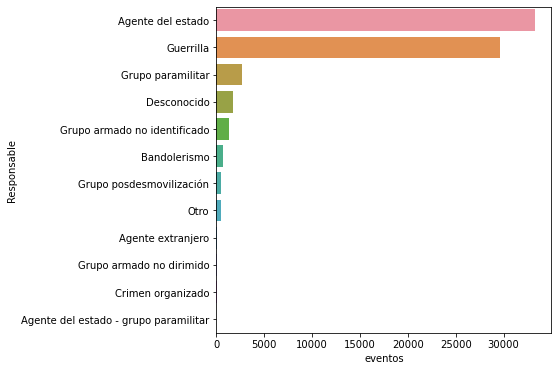

In [16]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df_responsables.groupby(["Responsable"]).size().nlargest(20) \
            .reset_index().rename({0: "eventos"}, axis="columns"), 
            y="Responsable", x="eventos")

<AxesSubplot:xlabel='eventos', ylabel='Responsable Descripcion'>

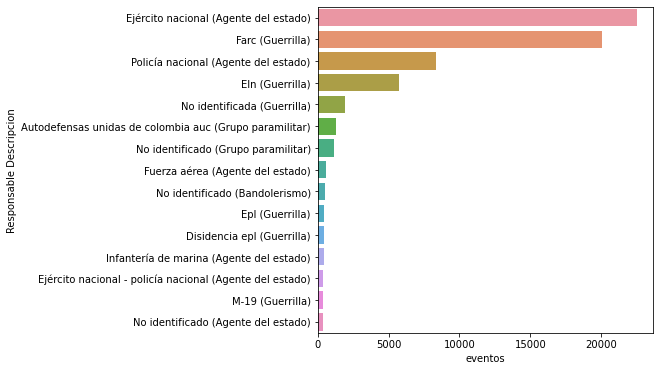

In [17]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df_responsables.groupby(["Responsable Descripcion"]).size().nlargest(15) \
            .reset_index().rename({0: "eventos"}, axis="columns"), 
            y="Responsable Descripcion", x="eventos")

In [18]:
df_responsables_top = df_responsables.groupby(["Responsable", "Descripcion"]).size().sort_values(ascending=False).reset_index().rename({0: "eventos"}, axis="columns")
df_responsables_top["cum_sum"] = df_responsables_top["eventos"].cumsum()
df_responsables_top['cum_perc'] = 100*df_responsables_top['cum_sum']/df_responsables_top['eventos'].sum()
df_responsables_top.iloc[:20]

,Responsable,Descripcion,eventos,cum_sum,cum_perc
0,Agente del estado,Ejército nacional,22492,22492,33.586190
1,Guerrilla,Farc,20041,42533,63.512424
2,Agente del estado,Policía nacional,8312,50845,75.924322
3,Guerrilla,Eln,5727,56572,84.476168
4,Guerrilla,No identificada,1926,58498,87.352168
5,Grupo paramilitar,Autodefensas unidas de colombia auc,1283,59781,89.268009
6,Grupo paramilitar,No identificado,1118,60899,90.937463
7,Agente del estado,Fuerza aérea,613,61512,91.852825
8,Bandolerismo,No identificado,539,62051,92.657687
9,Guerrilla,Epl,464,62515,93.350555


## Capturas, Muertes, Víctimas y Lesionados

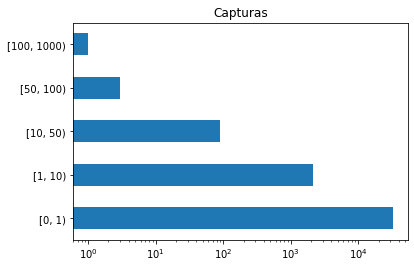

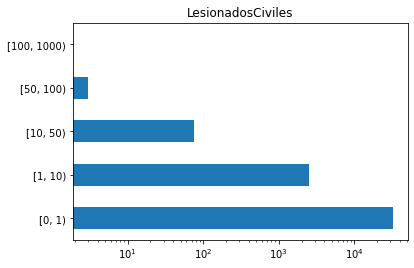

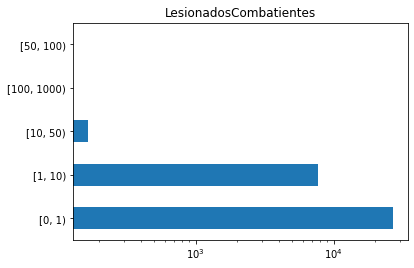

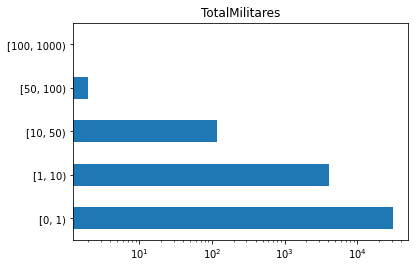

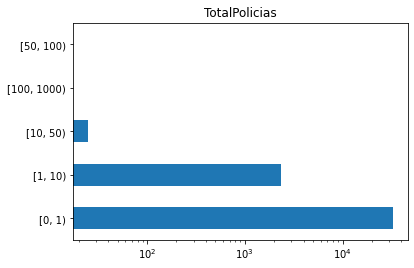

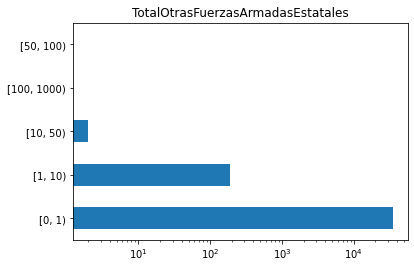

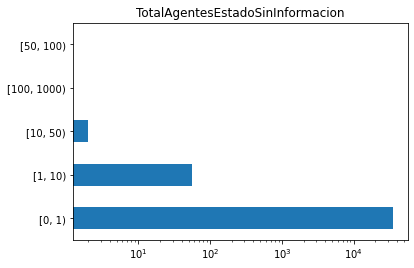

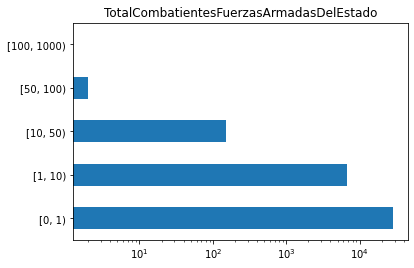

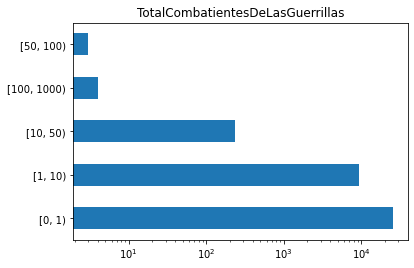

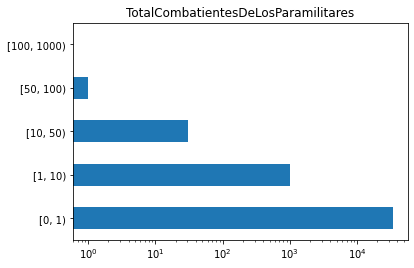

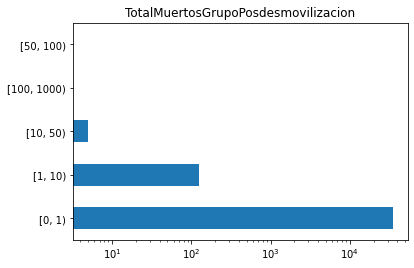

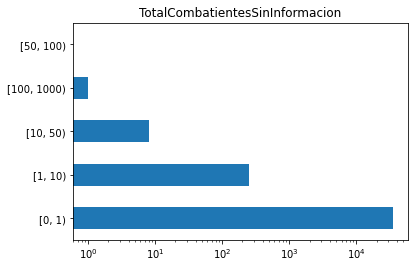

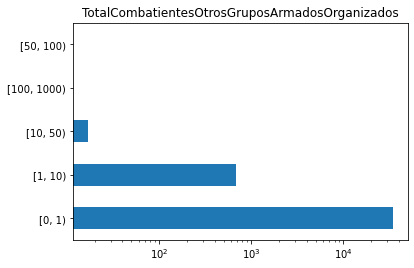

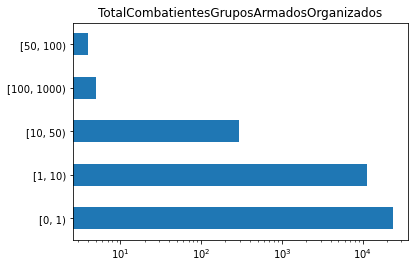

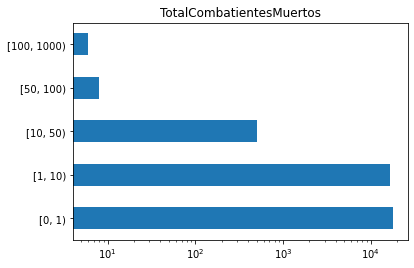

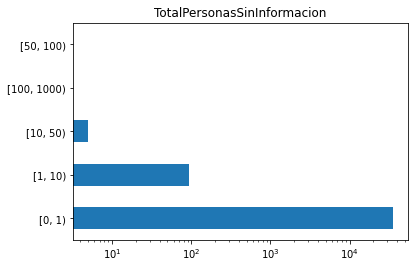

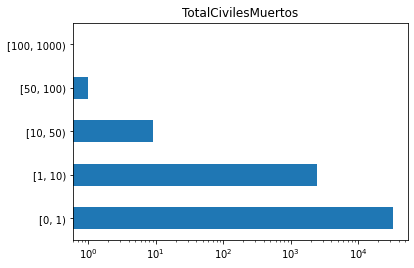

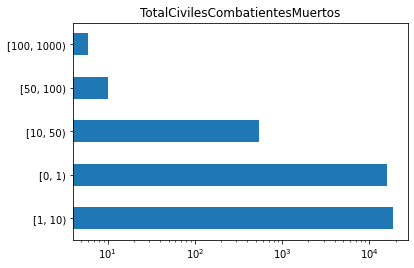

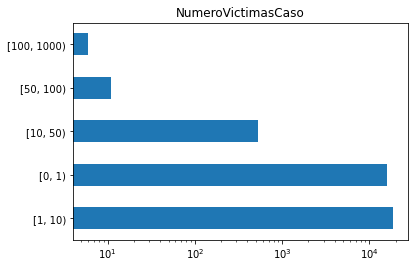

In [47]:
for col in df_acciones.filter(regex=r"Total|Capturas|Lesionados|Victimas").columns:
    plt.figure()
    plt.title(col)
    pd.cut(df_acciones[col], bins=[0, 1, 10, 50, 100, 1000], include_lowest=True, right=False).value_counts().plot(kind="barh", logx=True)

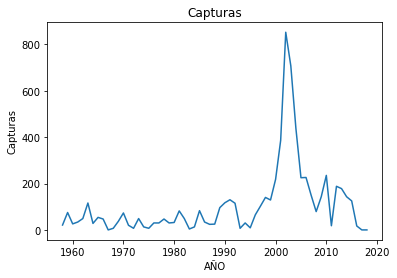

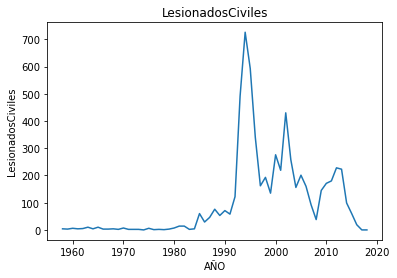

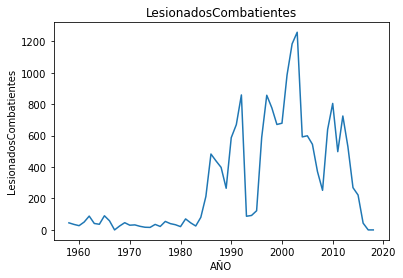

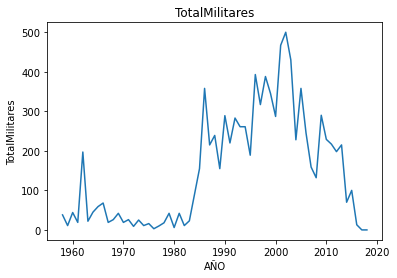

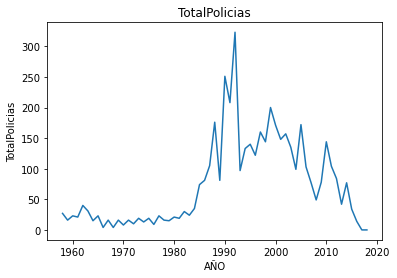

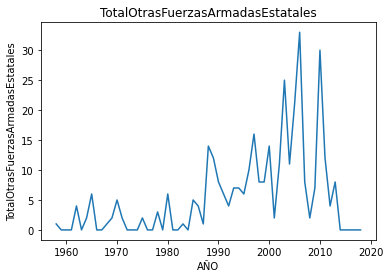

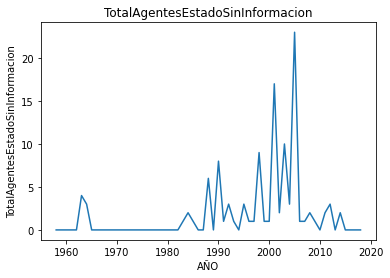

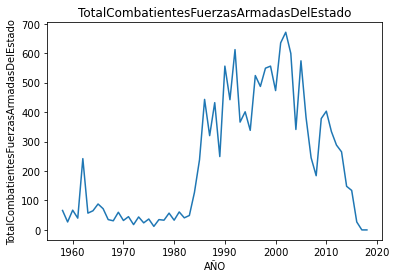

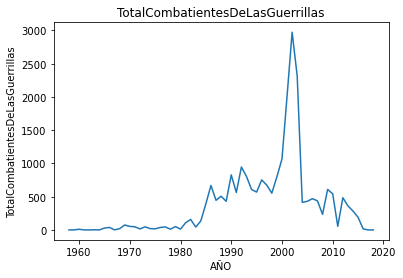

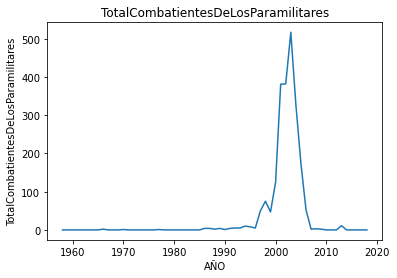

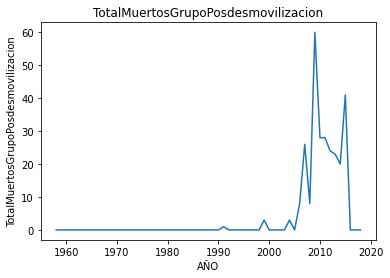

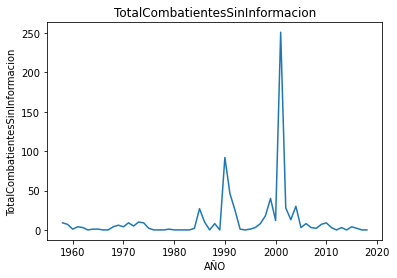

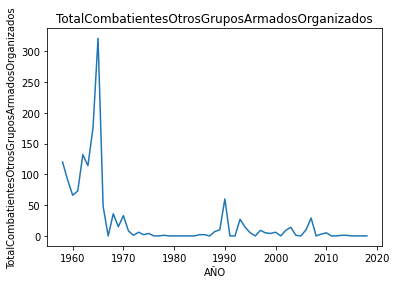

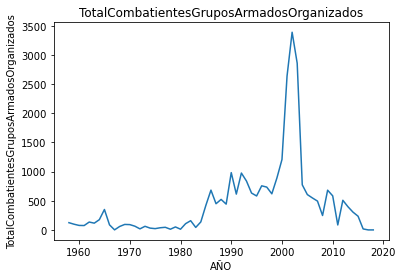

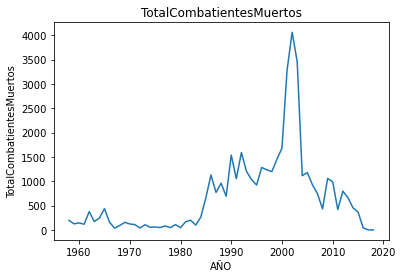

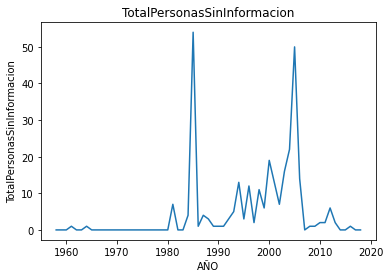

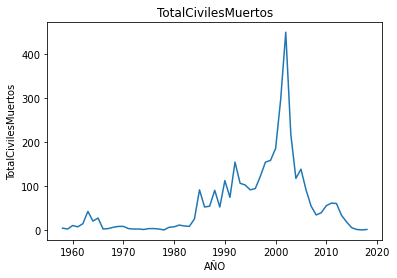

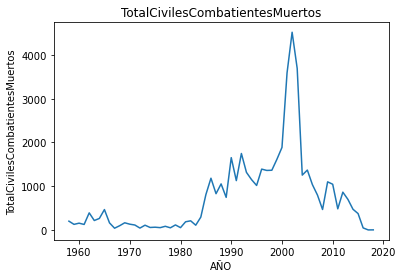

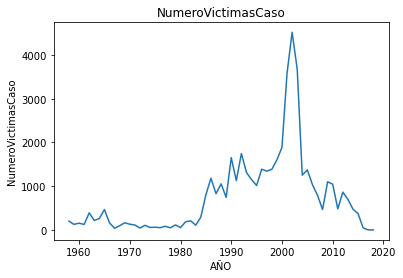

In [76]:
for col in df_acciones.filter(regex=r"Total|Capturas|Lesionados|Victimas").columns:
    plt.figure()
    plt.title(col)
    sns.lineplot(data=df_acciones.groupby("AÑO").agg({col: "sum"}).reset_index(), x="AÑO", y=col)

### Muertes

<AxesSubplot:title={'center':'Civiles y Combatientes Muertos'}, xlabel='AÑO', ylabel='TotalCivilesCombatientesMuertos'>

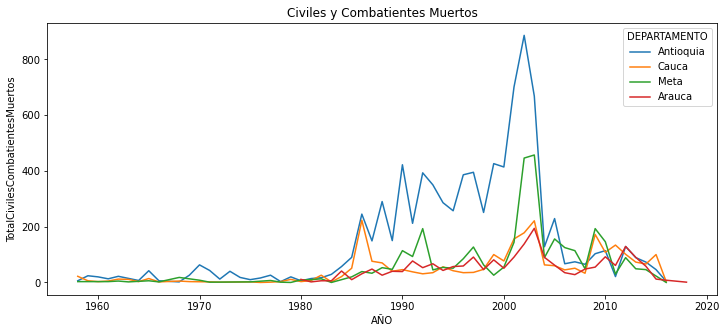

In [84]:
plt.figure(figsize=(12, 5))
plt.title("Civiles y Combatientes Muertos")
sns.lineplot(data=df_acciones.query("DEPARTAMENTO in ['Antioquia', 'Cauca', 'Meta', 'Arauca']").groupby(["AÑO", "DEPARTAMENTO"]).agg({"TotalCivilesCombatientesMuertos": "sum"}).reset_index(), x="AÑO", y="TotalCivilesCombatientesMuertos", hue="DEPARTAMENTO")

In [85]:
df_acciones["TotalCivilesCombatientesMuertos"].sum()

46432.0

In [89]:
df_acciones.groupby(["AÑO"]).agg({"TotalCivilesCombatientesMuertos": "sum"}).nlargest(5, "TotalCivilesCombatientesMuertos").reset_index()

,AÑO,TotalCivilesCombatientesMuertos
0,2002.0,4519.0
1,2003.0,3692.0
2,2001.0,3589.0
3,2000.0,1886.0
4,1992.0,1747.0


In [90]:
df_acciones.groupby(["DEPARTAMENTO"]).agg({"TotalCivilesCombatientesMuertos": "sum"}).nlargest(5, "TotalCivilesCombatientesMuertos").reset_index()

,DEPARTAMENTO,TotalCivilesCombatientesMuertos
0,Antioquia,8729.0
1,Meta,3352.0
2,Santander,2842.0
3,Cauca,2741.0
4,Valle Del Cauca,2326.0


<AxesSubplot:title={'center':'Capturas'}, xlabel='AÑO', ylabel='Capturas'>

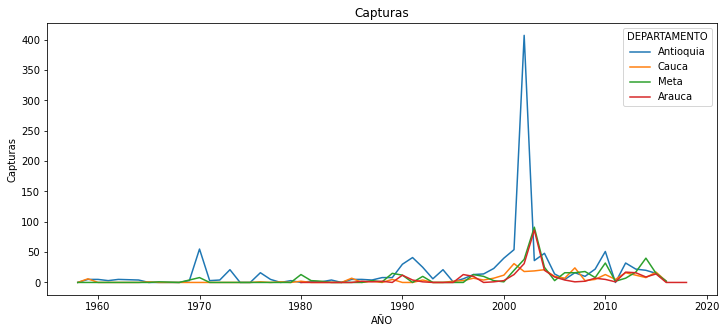

In [93]:
plt.figure(figsize=(12, 5))
plt.title("Capturas")
sns.lineplot(data=df_acciones.query("DEPARTAMENTO in ['Antioquia', 'Cauca', 'Meta', 'Arauca']").groupby(["AÑO", "DEPARTAMENTO"]).agg({"Capturas": "sum"}).reset_index(), x="AÑO", y="Capturas", hue="DEPARTAMENTO")

In [98]:
 df_acciones.filter(regex=r"Total|Capturas|Lesionados|Victimas").sort_values("TotalCivilesCombatientesMuertos", ascending=False).head(5)

,Capturas,LesionadosCiviles,LesionadosCombatientes,TotalMilitares,TotalPolicias,TotalOtrasFuerzasArmadasEstatales,TotalAgentesEstadoSinInformacion,TotalCombatientesFuerzasArmadasDelEstado,TotalCombatientesDeLasGuerrillas,TotalCombatientesDeLosParamilitares,TotalMuertosGrupoPosdesmovilizacion,TotalCombatientesSinInformacion,TotalCombatientesOtrosGruposArmadosOrganizados,TotalCombatientesGruposArmadosOrganizados,TotalCombatientesMuertos,TotalPersonasSinInformacion,TotalCivilesMuertos,TotalCivilesCombatientesMuertos,NumeroVictimasCaso
33919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,200.0,200.0,0.0,0.0,200.0,200
16006,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,150.0,150.0,0.0,2.0,152.0,152
16875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,150.0,150.0,0.0,0.0,150.0,150
11959,0.0,0.0,24.0,36.0,0.0,0.0,0.0,36.0,66.0,0.0,0.0,0.0,0.0,66.0,102.0,0.0,0.0,102.0,102
16904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,100.0,100


## Víctimas

In [54]:
df_victimas = pd.read_csv('../../data/memoria_historica/victimas_acciones_belicas.csv', na_values=custom_na_values)

In [68]:
df_check_references = df_acciones.merge(df_victimas, on="IdCaso", how="left").groupby("IdCaso").agg({"Id": "count", "NumeroVictimasCaso": "min", "TotalCivilesCombatientesMuertos": "min"})
df_check_references[df_check_references["NumeroVictimasCaso"] != df_check_references["Id"]]

,Id,NumeroVictimasCaso,TotalCivilesCombatientesMuertos
IdCaso,,,
3261,3,4,4.0
7892,3,0,0.0
16326,0,1,1.0


In [100]:
df_check_references[df_check_references["Id"] != df_check_references["TotalCivilesCombatientesMuertos"]].sort_values("TotalCivilesCombatientesMuertos", ascending=False)

,Id,NumeroVictimasCaso,TotalCivilesCombatientesMuertos
IdCaso,,,
12148,58,58,38.0
24901,16,16,14.0
397330,3,3,12.0
23784,12,12,11.0
13852,0,0,11.0
...,...,...,...
3524,1,1,0.0
30224,1,1,0.0
7892,3,0,0.0


In [101]:
df_victimas = df_victimas.rename(
    {"ANNOH": "AÑO", "MUNINICIO_CASO": "MUNICIPIO", "DEPTO_CASO": "DEPARTAMENTO"}, 
    axis="columns")
df_victimas["AÑO"] = df_victimas["AÑO"].replace(0, np.nan)
df_victimas["DEPARTAMENTO"] = df_victimas["DEPARTAMENTO"].replace(
    {"Archipiélago de san andrés, providencia y santa catalina": "San Andrés", "La Guajira": "Guajira"}
).str.title().str.strip()
df_victimas["MUNICIPIO"] = df_victimas["MUNICIPIO"].str.title().str.strip()
df_victimas["MUNICIPIO_DEPARTAMENTO"] = df_victimas["MUNICIPIO"] + " (" + df_victimas["DEPARTAMENTO"] + ")"

In [102]:
df_victimas

,IdCaso,Id,DIAH,MESH,AÑO,COD_DANE_MUN,DEPARTAMENTO,MUNICIPIO,Sexo,Etnia,OcupacionVictima,CalidadVictima,TipoPoblacionVulnerable,Grupo,DESCRIPCION_GRUPO,Estado,MUNICIPIO_DEPARTAMENTO
0,1,1,12,3,2006.0,27073.0,Chocó,Bagadó,H,NaN,NaN,Civil,NaN,NaN,NaN,Publicado,Bagadó (Chocó)
1,2,2,0,0,NaN,23079.0,Córdoba,Buenavista,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Das,Publicado,Buenavista (Córdoba)
2,2,3,0,0,NaN,23079.0,Córdoba,Buenavista,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Das,Publicado,Buenavista (Córdoba)
3,2,4,0,0,NaN,23079.0,Córdoba,Buenavista,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Das,Publicado,Buenavista (Córdoba)
4,2,5,0,0,NaN,23079.0,Córdoba,Buenavista,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Das,Publicado,Buenavista (Córdoba)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46404,3524,580467,3,11,1988.0,68406.0,Santander,Lebrija,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Policía nacional,Publicado,Lebrija (Santander)
46405,396532,580475,0,10,1986.0,68001.0,Santander,Bucaramanga,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Ejército nacional,Publicado,Bucaramanga (Santander)
46406,396532,580476,0,10,1986.0,68001.0,Santander,Bucaramanga,M,NaN,NaN,Civil,NaN,NaN,NaN,Publicado,Bucaramanga (Santander)
46407,1096,580492,4,4,1968.0,50287.0,Meta,Fuente De Oro,H,NaN,Bandolero,Combatiente,NaN,Bandolerismo,No identificado,Publicado,Fuente De Oro (Meta)


<AxesSubplot:xlabel='victimas', ylabel='DEPARTAMENTO'>

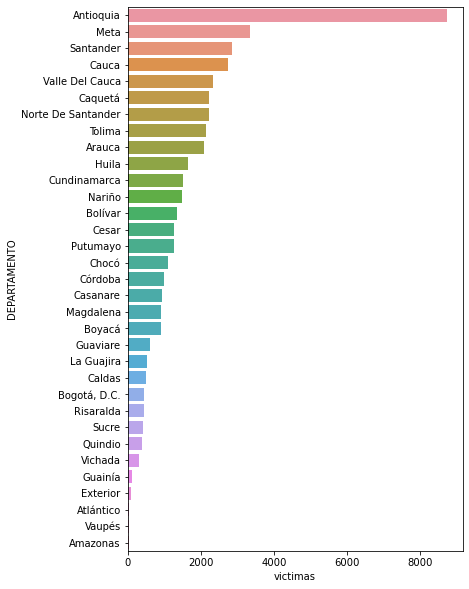

In [107]:
plt.figure(figsize=(6, 10))
sns.barplot(data=df_victimas.groupby("DEPARTAMENTO").size().sort_values(ascending=False) \
            .reset_index().rename({0: "victimas"}, axis="columns"), 
            y="DEPARTAMENTO", x="victimas")

<AxesSubplot:xlabel='victimas', ylabel='MUNICIPIO_DEPARTAMENTO'>

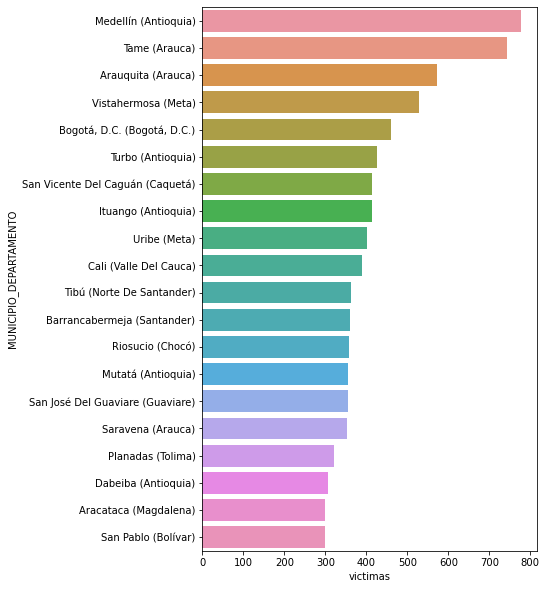

In [106]:
plt.figure(figsize=(6, 10))
sns.barplot(data=df_victimas.groupby("MUNICIPIO_DEPARTAMENTO").size().nlargest(20) \
            .reset_index().rename({0: "victimas"}, axis="columns"), 
            y="MUNICIPIO_DEPARTAMENTO", x="victimas")

In [108]:
df_victimas["MUNICIPIO_DEPARTAMENTO"].nunique()

938

<AxesSubplot:xlabel='AÑO', ylabel='events'>

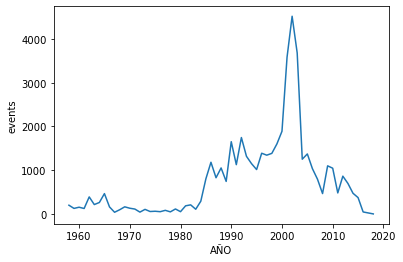

In [109]:
sns.lineplot(data=df_victimas.groupby("AÑO").size().reset_index().rename({0: "events"}, axis="columns"), x="AÑO", y="events")

<AxesSubplot:xlabel='victimas', ylabel='OcupacionVictima'>

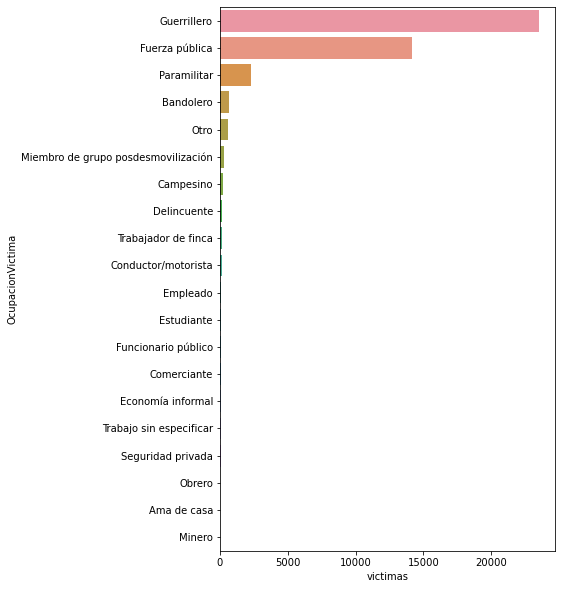

In [113]:
plt.figure(figsize=(6, 10))
sns.barplot(data=df_victimas.groupby("OcupacionVictima").size().nlargest(20) \
            .reset_index().rename({0: "victimas"}, axis="columns"), 
            y="OcupacionVictima", x="victimas")

<AxesSubplot:xlabel='victimas', ylabel='CalidadVictima'>

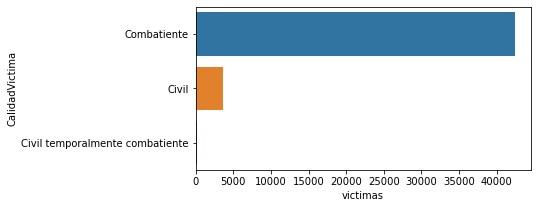

In [117]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df_victimas.groupby("CalidadVictima").size().nlargest(20) \
            .reset_index().rename({0: "victimas"}, axis="columns"), 
            y="CalidadVictima", x="victimas")

<AxesSubplot:xlabel='victimas', ylabel='Grupo'>

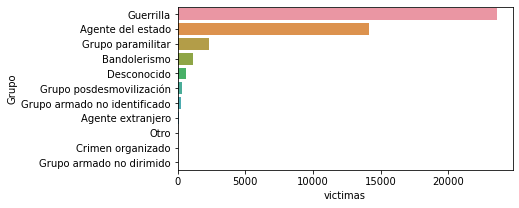

In [118]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df_victimas.groupby("Grupo").size().nlargest(20) \
            .reset_index().rename({0: "victimas"}, axis="columns"), 
            y="Grupo", x="victimas")

<AxesSubplot:xlabel='victimas', ylabel='Etnia'>

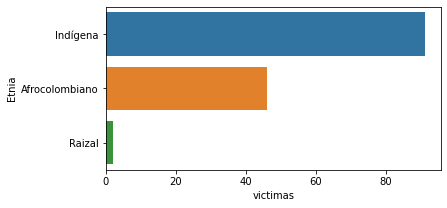

In [119]:
plt.figure(figsize=(6, 3))
sns.barplot(data=df_victimas.groupby("Etnia").size().nlargest(20) \
            .reset_index().rename({0: "victimas"}, axis="columns"), 
            y="Etnia", x="victimas")

<AxesSubplot:xlabel='victimas', ylabel='Sexo'>

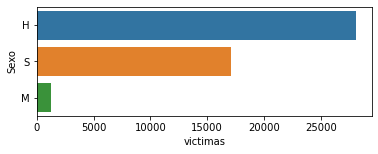

In [121]:
plt.figure(figsize=(6, 2))
sns.barplot(data=df_victimas.groupby("Sexo").size().nlargest(20) \
            .reset_index().rename({0: "victimas"}, axis="columns"), 
            y="Sexo", x="victimas")